In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qena
Processing Record 2 of Set 1 | cap malheureux
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | maceio
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | tazovskiy
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | pokaran
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | lerwick
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | sentyabr

Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | tukrah
Processing Record 40 of Set 4 | mbuyapey
Processing Record 41 of Set 4 | richards bay
Processing Record 42 of Set 4 | atuona
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | saint-paul
Processing Record 46 of Set 4 | guarapari
Processing Record 47 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | deputatskiy
Processing Record 50 of Set 4 | qui nhon
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | mocajuba
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | labytnangi
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | solwezi
Processing Record 9 of Set 5 | tenenkou
Processing Record 10 of Set 5 | tuat

Processing Record 29 of Set 8 | russell
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | thompson
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | teahupoo
Processing Record 34 of Set 8 | anzio
Processing Record 35 of Set 8 | rincon
Processing Record 36 of Set 8 | bossembele
City not found. Skipping...
Processing Record 37 of Set 8 | asau
Processing Record 38 of Set 8 | lara
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | nouakchott
Processing Record 41 of Set 8 | kapoeta
Processing Record 42 of Set 8 | nishihara
Processing Record 43 of Set 8 | suntar
Processing Record 44 of Set 8 | lucea
Processing Record 45 of Set 8 | kakrala
Processing Record 46 of Set 8 | pervomayskoye
Processing Record 47 of Set 8 | palmas
Processing Record 48 of Set 8 | leningradskiy
Processing Record 49 of Set 8 | aripuana
Processing Record 50 of Set 8 | khvalynsk
Processing Record 1 of Set 9 | ilo
Processing Record 2 of Set 9 | shache
Pro

Processing Record 23 of Set 12 | lagoa
Processing Record 24 of Set 12 | pitimbu
Processing Record 25 of Set 12 | katima mulilo
Processing Record 26 of Set 12 | cartagena del chaira
Processing Record 27 of Set 12 | arona
Processing Record 28 of Set 12 | madera
Processing Record 29 of Set 12 | taganak
Processing Record 30 of Set 12 | korhogo
Processing Record 31 of Set 12 | alotau
City not found. Skipping...
Processing Record 32 of Set 12 | ribeira brava
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | sao joao da barra
Processing Record 35 of Set 12 | sitio novo do tocantins
Processing Record 36 of Set 12 | lulea
Processing Record 37 of Set 12 | votorantim
Processing Record 38 of Set 12 | petropavlovka
Processing Record 39 of Set 12 | nelidovo
Processing Record 40 of Set 12 | porto novo
Processing Record 41 of Set 12 | catamarca
Processing Record 42 of Set 12 | kozhva
Processing Record 43 of Set 12 | port hardy
Processing Record 44 of Set 12 | morro bay
Process

In [13]:
len(city_data)

579

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qena,26.1615,32.7183,90.36,10,0,6.73,EG,2021-10-24 12:03:23
1,Cap Malheureux,-19.9842,57.6142,78.48,68,38,10.00,MU,2021-10-24 12:01:08
2,Ribeira Grande,38.5167,-28.7000,68.40,60,20,11.50,PT,2021-10-24 12:03:23
3,Srednekolymsk,67.4500,153.6833,-9.85,96,82,3.31,RU,2021-10-24 12:03:23
4,Maceio,-9.6658,-35.7353,89.04,66,75,17.27,BR,2021-10-24 12:00:14
5,Cape Town,-33.9258,18.4232,72.12,36,0,4.00,ZA,2021-10-24 11:59:23
6,Sitka,57.0531,-135.3300,42.71,86,96,5.44,US,2021-10-24 12:03:24
7,Vaini,-21.2000,-175.2000,73.04,60,75,12.06,TO,2021-10-24 12:03:24
8,Tazovskiy,67.4667,78.7000,27.32,94,99,13.87,RU,2021-10-24 12:03:24
9,Vila Franca Do Campo,37.7167,-25.4333,70.21,58,33,6.64,PT,2021-10-24 12:03:25


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qena,EG,2021-10-24 12:03:23,26.1615,32.7183,90.36,10,0,6.73
1,Cap Malheureux,MU,2021-10-24 12:01:08,-19.9842,57.6142,78.48,68,38,10.00
2,Ribeira Grande,PT,2021-10-24 12:03:23,38.5167,-28.7000,68.40,60,20,11.50
3,Srednekolymsk,RU,2021-10-24 12:03:23,67.4500,153.6833,-9.85,96,82,3.31
4,Maceio,BR,2021-10-24 12:00:14,-9.6658,-35.7353,89.04,66,75,17.27
5,Cape Town,ZA,2021-10-24 11:59:23,-33.9258,18.4232,72.12,36,0,4.00
6,Sitka,US,2021-10-24 12:03:24,57.0531,-135.3300,42.71,86,96,5.44
7,Vaini,TO,2021-10-24 12:03:24,-21.2000,-175.2000,73.04,60,75,12.06
8,Tazovskiy,RU,2021-10-24 12:03:24,67.4667,78.7000,27.32,94,99,13.87
9,Vila Franca Do Campo,PT,2021-10-24 12:03:25,37.7167,-25.4333,70.21,58,33,6.64


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

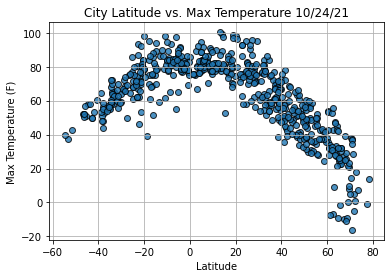

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

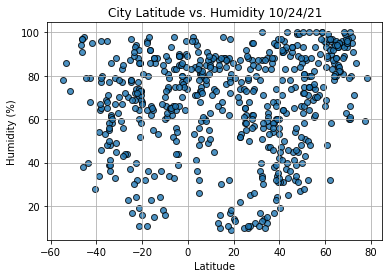

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

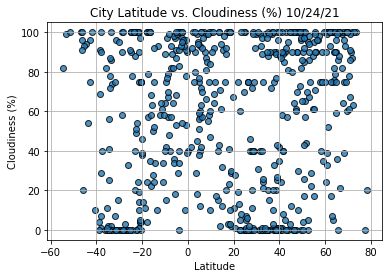

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

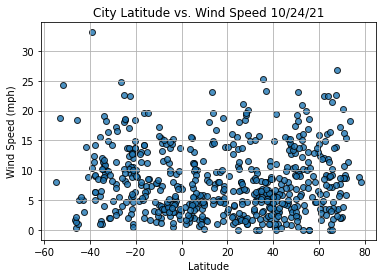

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2021-10-24 12:03:26
Lat                       -33.918
Lng                       25.5701
Max Temp                    65.34
Humidity                       48
Cloudiness                     72
Wind Speed                  10.98
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qena,EG,2021-10-24 12:03:23,26.1615,32.7183,90.36,10,0,6.73
2,Ribeira Grande,PT,2021-10-24 12:03:23,38.5167,-28.7000,68.40,60,20,11.50
3,Srednekolymsk,RU,2021-10-24 12:03:23,67.4500,153.6833,-9.85,96,82,3.31
6,Sitka,US,2021-10-24 12:03:24,57.0531,-135.3300,42.71,86,96,5.44
8,Tazovskiy,RU,2021-10-24 12:03:24,67.4667,78.7000,27.32,94,99,13.87


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

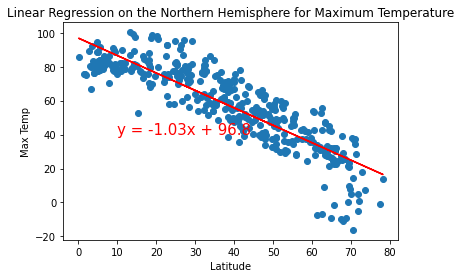

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

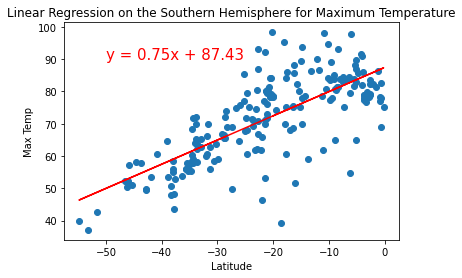

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

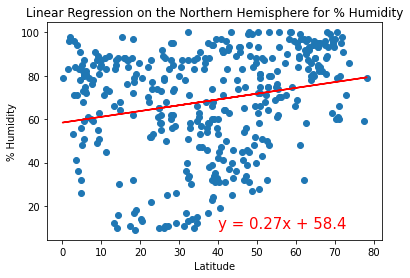

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

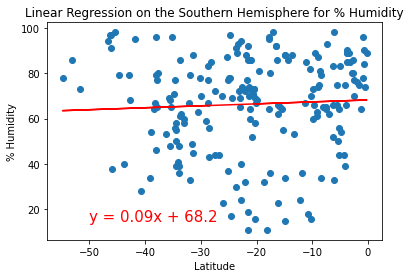

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


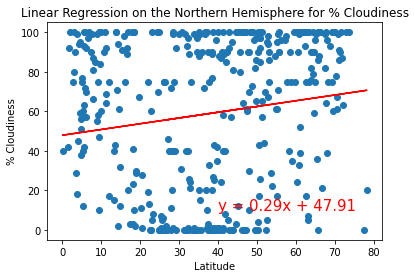

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

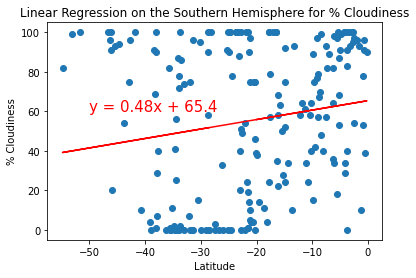

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

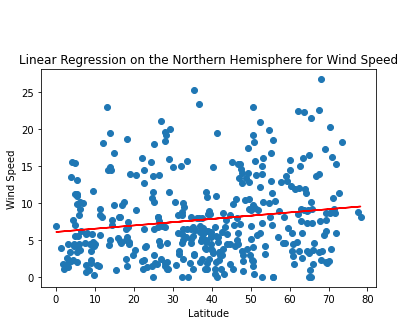

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

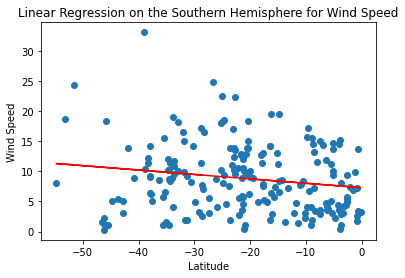

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))